Коэффициент b1 (наклон): 0.9927
Коэффициент b0 (свободный член): 1.0600
Коэффициент корреляции r: 0.9988
[ 2.05272727  3.04545455  4.03818182  5.03090909  6.02363636  7.01636364
  8.00909091  9.00181818  9.99454545 10.98727273]
Дисперсия D1: 0.0213
Критерий Фишера F: 0.2129


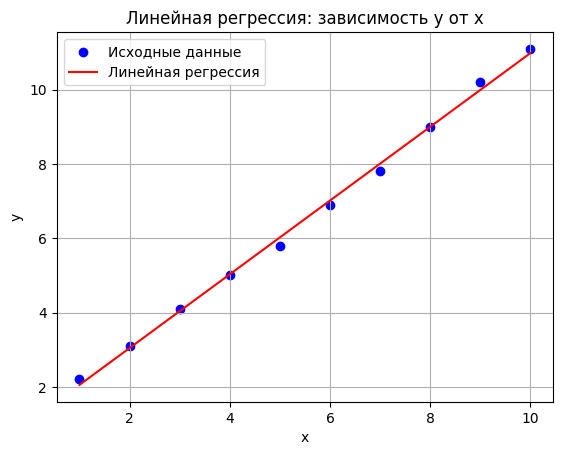

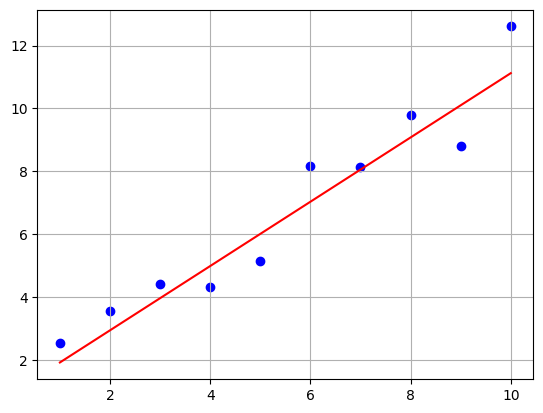

In [1]:
import numpy as np
import random

# Исходные данные
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1])

# Количество наблюдений
n = len(x)

# Вычисляем средние значения
x_mean = np.mean(x)
y_mean = np.mean(y)

# Вычисляем коэффициенты линейной регрессии b1 и b0
b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
b0 = y_mean - b1 * x_mean

# Коэффициент корреляции r
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
r = numerator / denominator

# Результаты
print(f"Коэффициент b1 (наклон): {b1:.4f}")
print(f"Коэффициент b0 (свободный член): {b0:.4f}")
print(f"Коэффициент корреляции r: {r:.4f}")


# Предсказанные значения y (y_hat)
y_pred = b0 + b1 * x
print(y_pred)

# Вычисляем дисперсию D1
D1 = np.sum((y - y_pred) ** 2) / (n - 1)

print(f"Дисперсия D1: {D1:.4f}")


# Дисперсия S^2 по условию задачи
S2 = 0.1

# Критерий Фишера
F = D1 / S2

print(f"Критерий Фишера F: {F:.4f}")


n_percent = 20
new_y = y.copy()
b0_diffs = []
b1_diffs = []

for i in range(len(y)):
    new_y[i] = random.randint(1, 10)*(n_percent/100+1)+y[i]

new_y_mean = np.mean(new_y)


for i in range(len(new_y)):
    new_b1 = np.sum((x[i] - x_mean) * (new_y[i]-new_y_mean)) / np.sum((x[i] - x_mean) ** 2)
    new_b0 = new_y_mean - new_b1 * x_mean
    if new_b0 < 0 or new_b1 < 0:
        new_b1, new_b0 = b1_diffs[-1], b0_diffs[-1]
    b0_diffs.append(new_b0)
    b1_diffs.append(new_b1)

# print("NEW:")
# print(new_y)
# print(b0_diffs)
# print(b1_diffs)

import matplotlib.pyplot as plt

# Построение графика
plt.scatter(x, y, color="blue", label="Исходные данные")
plt.plot(x, y_pred, color="red", label="Линейная регрессия")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия: зависимость y от x")
plt.legend()
plt.grid()
plt.show()


noise = y * 0.2
y_new = y + np.random.uniform(-noise, noise)


b1_new = np.sum((x - x_mean) * (y_new - y_mean)) / np.sum((x - x_mean) ** 2)
b0_new = y_mean - b1_new * x_mean
y_pred_new = b0_new + b1_new * x


plt.scatter(x, y_new, color="blue", label="Исходные данные")
plt.plot(x, y_pred_new, color="red", label="Линейная регрессия")
plt.grid()
plt.show()
